# WTI COT MM Nowcasting EDA 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import scipy.stats as stats

In [5]:
import sys
sys.path.append('../../../')

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [8]:
from src.utils.dates import get_nyse_business_dates
from src.utils.io.read import PreprocessedDataReader

In [9]:
from src.preprocessing.base import FutureTicker

In [10]:
from src.settings import Settings

In [11]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(3)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
810,2025-07-15,CL,368688.0,1226014.0,857326.0,217954.0,404769.0,186815.0,31871.0,25279.0,...,225987.0,335852.0,-232123.0,-916765.0,-1.81,0.08,-1.61,0.11,-1.33,0.18
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.90,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset['tradeDate'].min(),dataset['tradeDate'].max()

('2010-01-05', '2025-07-29')

In [17]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date 

In [18]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

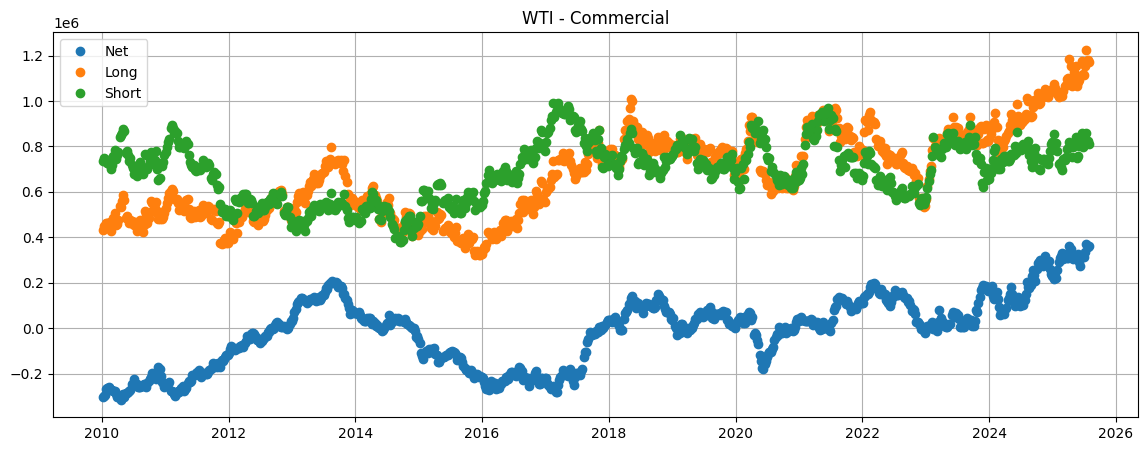

In [21]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['Commercial_NetPosition'])
plt.plot_date(dataset['tradeDate'],dataset['CommercialLongPosition'])
plt.plot_date(dataset['tradeDate'],dataset['CommercialShortPosition'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Commercial')
plt.grid()

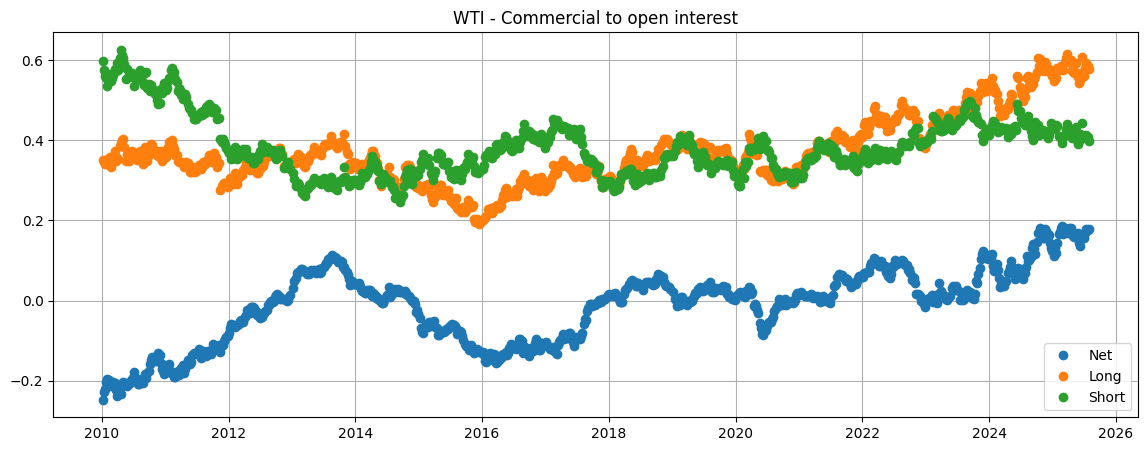

In [22]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['Commercial_NetPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['CommercialLongPosition_to_openinterest'])
plt.plot_date(dataset['tradeDate'],dataset['CommercialShortPosition_to_openinterest'])
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Commercial to open interest')
plt.grid()

In [23]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate'])
dataset['year']=dataset['tradeDate'].dt.year
dataset['day_of_week'] = dataset['tradeDate'].dt.day_name()
dataset['day_of_week'].unique()
dataset.sort_values(by = 'tradeDate', ascending = True, inplace = True)


In [ ]:




# for feature_name in [
#                     'ManagedMoney_NetPosition',
#                     'ManagedMoney_LongPosition', 
#                     'ManagedMoney_ShortPosition']:
#     dataset[f'prior_report_{feature_name}_change'] = dataset[feature_name]- dataset[feature_name].shift(1)






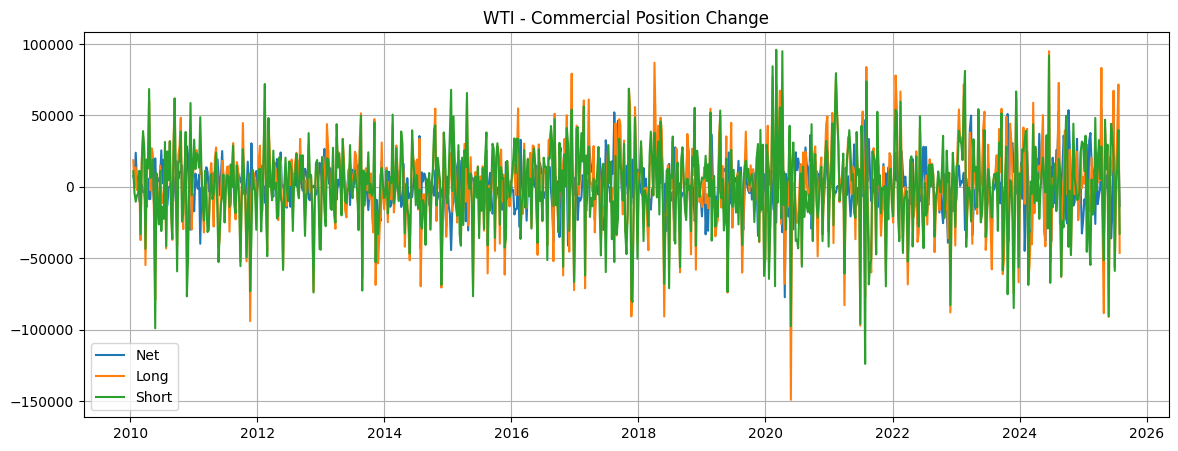

In [24]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_Commercial_NetPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_CommercialLongPosition_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_CommercialShortPosition_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Commercial Position Change')
plt.grid()

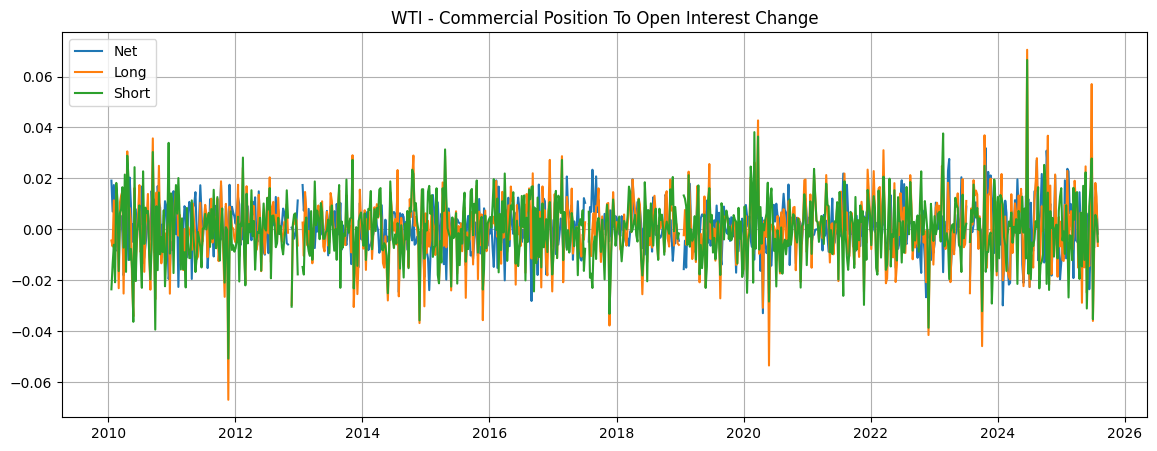

In [25]:
plt.rcParams["figure.figsize"] = (14,5)
plt.plot_date(dataset['tradeDate'],dataset['prior_report_Commercial_NetPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_CommercialLongPosition_to_openinterest_change'], '-')
plt.plot_date(dataset['tradeDate'],dataset['prior_report_CommercialShortPosition_to_openinterest_change'], '-')
plt.legend(['Net', 'Long', 'Short'])
plt.title('WTI - Commercial Position To Open Interest Change')
plt.grid()

In [26]:
dataset[['prior_report_Commercial_NetPosition_change',
 'prior_report_CommercialLongPosition_change',
 'prior_report_CommercialShortPosition_change']].corr()

,prior_report_Commercial_NetPosition_change,prior_report_CommercialLongPosition_change,prior_report_CommercialShortPosition_change
prior_report_Commercial_NetPosition_change,1.000000,0.318388,-0.202921
prior_report_CommercialLongPosition_change,0.318388,1.000000,0.863631
prior_report_CommercialShortPosition_change,-0.202921,0.863631,1.000000


In [27]:
dataset[['prior_report_Commercial_NetPosition_to_openinterest_change',
 'prior_report_CommercialLongPosition_to_openinterest_change',
 'prior_report_CommercialShortPosition_to_openinterest_change']].corr()

,prior_report_Commercial_NetPosition_to_openinterest_change,prior_report_CommercialLongPosition_to_openinterest_change,prior_report_CommercialShortPosition_to_openinterest_change
prior_report_Commercial_NetPosition_to_openinterest_change,1.000000,0.420695,-0.306100
prior_report_CommercialLongPosition_to_openinterest_change,0.420695,1.000000,0.734881
prior_report_CommercialShortPosition_to_openinterest_change,-0.306100,0.734881,1.000000


Text(0.5, 1.0, 'Commercial Long/OI  change')

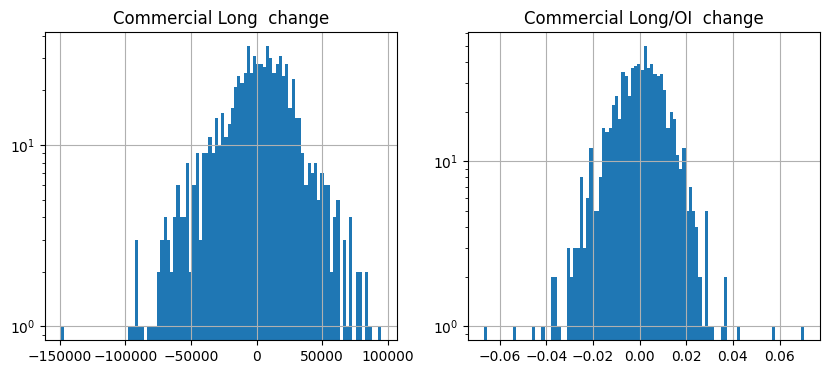

In [28]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_CommercialLongPosition_change'].hist(bins=100, log=True)
plt.title('Commercial Long  change')
plt.subplot(1, 2, 2)
dataset['prior_report_CommercialLongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('Commercial Long/OI  change')


Text(0.5, 1.0, 'Commercial Short/OI change')

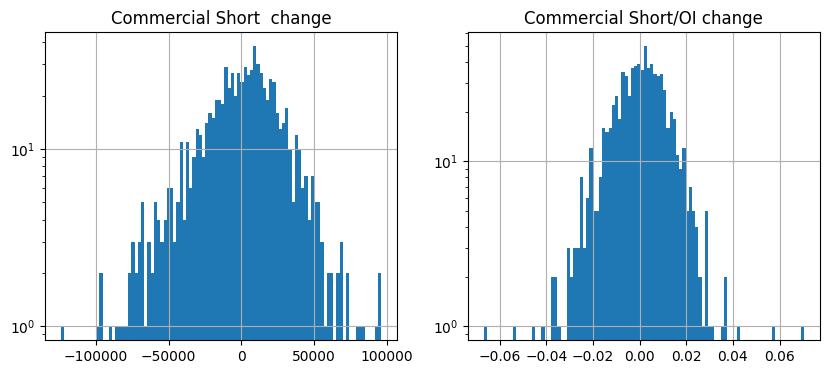

In [30]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_CommercialShortPosition_change'].hist(bins=100, log=True)
plt.title('Commercial Short  change')
plt.subplot(1, 2, 2)
dataset['prior_report_CommercialLongPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('Commercial Short/OI change')

Text(0.5, 1.0, 'Commercial Net/OI  change')

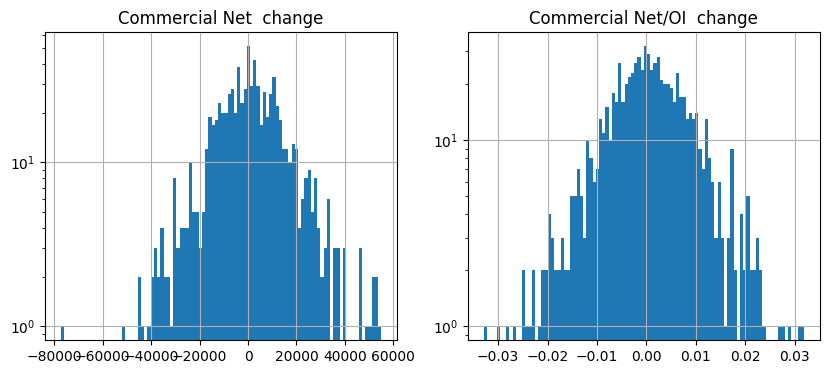

In [31]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1, 2, 1)
dataset['prior_report_Commercial_NetPosition_change'].hist(bins=100, log=True)
plt.title('Commercial Net  change')
plt.subplot(1, 2, 2)
dataset['prior_report_Commercial_NetPosition_to_openinterest_change'].hist(bins=100, log=True)
plt.title('Commercial Net/OI  change')



In [33]:
from research.eda.probability_distributions import test_normality_shapiro

In [34]:
for f in ['prior_report_Commercial_NetPosition_change', 
         'prior_report_CommercialLongPosition_change',
         'prior_report_CommercialShortPosition_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_Commercial_NetPosition_change
{'statistic': np.float64(0.9844651531470059), 'p_value': np.float64(1.4130853029679087e-07), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_CommercialLongPosition_change
{'statistic': np.float64(0.9856051379267754), 'p_value': np.float64(3.7571297361015103e-07), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_CommercialShortPosition_change
{'statistic': np.float64(0.9861271443372929), 'p_value': np.float64(5.96198724727642e-07), 'alpha': 0.05, 'verdict': 'Not normal'}


In [35]:
for f in ['prior_report_Commercial_NetPosition_to_openinterest_change', 
         'prior_report_CommercialLongPosition_to_openinterest_change',
         'prior_report_CommercialShortPosition_to_openinterest_change']:
    print(f)
    result = test_normality_shapiro(
    dataset[f]
    )
    print(result)


prior_report_Commercial_NetPosition_to_openinterest_change
{'statistic': np.float64(0.9924345499187156), 'p_value': np.float64(0.00042963120541465136), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_CommercialLongPosition_to_openinterest_change
{'statistic': np.float64(0.973372558196265), 'p_value': np.float64(6.800907737235389e-11), 'alpha': 0.05, 'verdict': 'Not normal'}
prior_report_CommercialShortPosition_to_openinterest_change
{'statistic': np.float64(0.9886638220729875), 'p_value': np.float64(7.620919725913528e-06), 'alpha': 0.05, 'verdict': 'Not normal'}


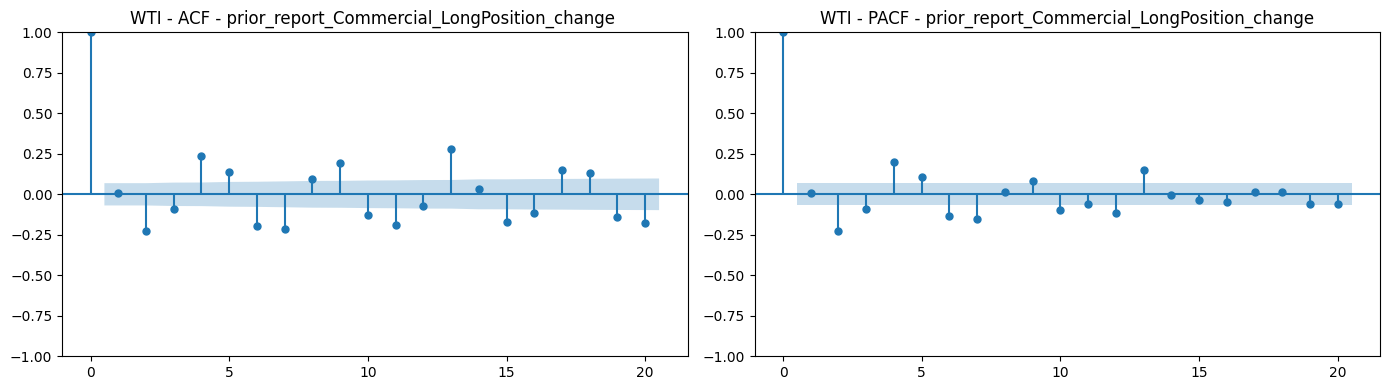

In [36]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_CommercialLongPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_Commercial_LongPosition_change ")

plot_pacf(dataset['prior_report_CommercialLongPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_Commercial_LongPosition_change")

plt.tight_layout()
plt.show()

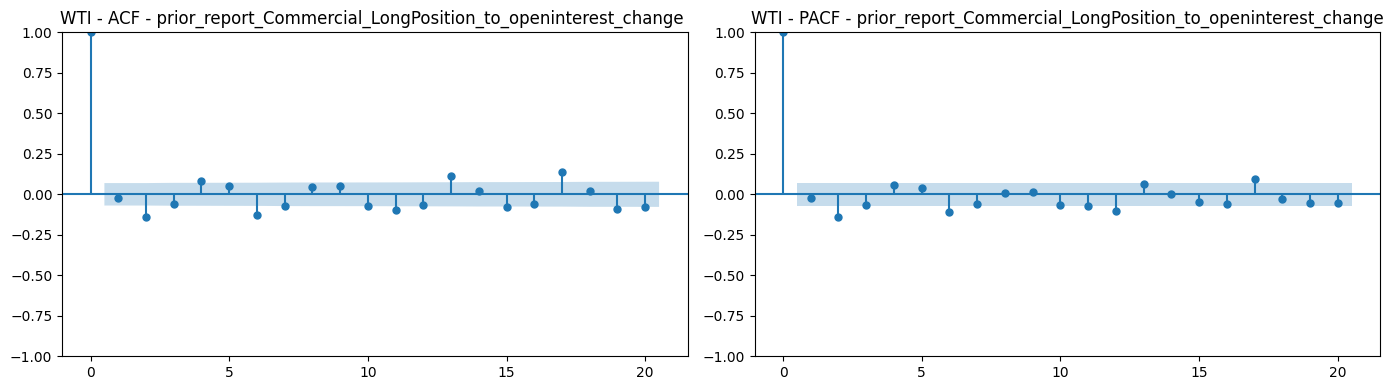

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_CommercialLongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_Commercial_LongPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_CommercialLongPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_Commercial_LongPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

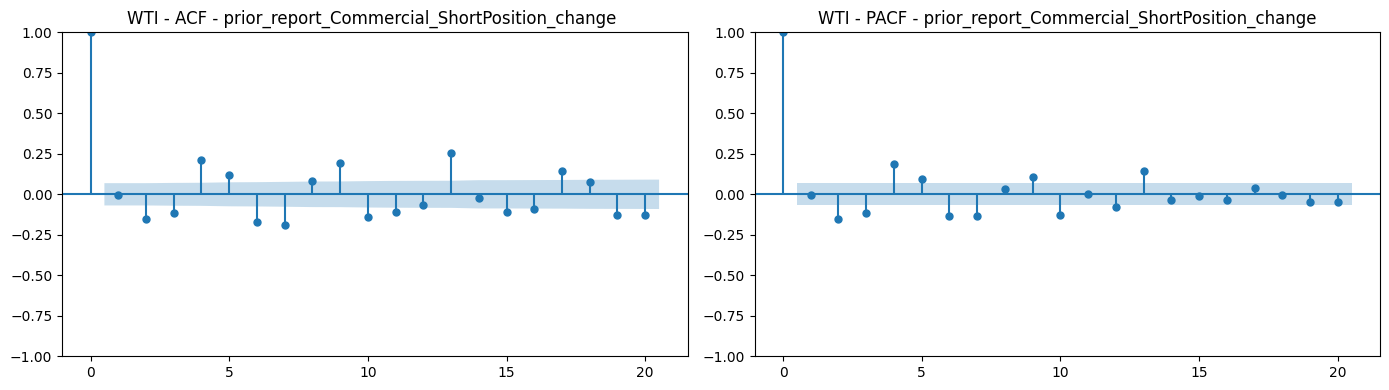

In [38]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_CommercialShortPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_Commercial_ShortPosition_change ")

plot_pacf(dataset['prior_report_CommercialShortPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_Commercial_ShortPosition_change")

plt.tight_layout()
plt.show()

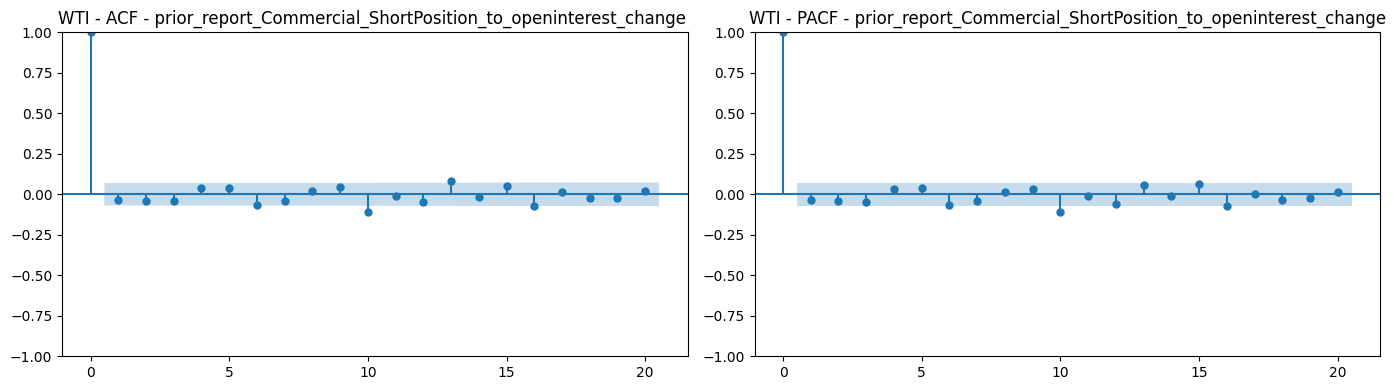

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_CommercialShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_Commercial_ShortPosition_to_openinterest_change ")

plot_pacf(dataset['prior_report_CommercialShortPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_Commercial_ShortPosition_to_openinterest_change")

plt.tight_layout()
plt.show()

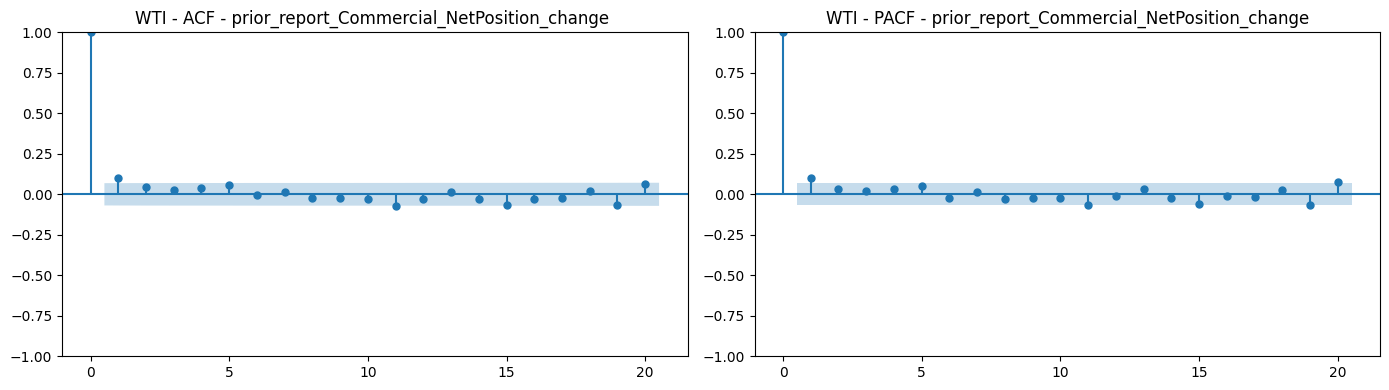

In [40]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_Commercial_NetPosition_change ")

plot_pacf(dataset['prior_report_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_Commercial_NetPosition_change")

plt.tight_layout()
plt.show()

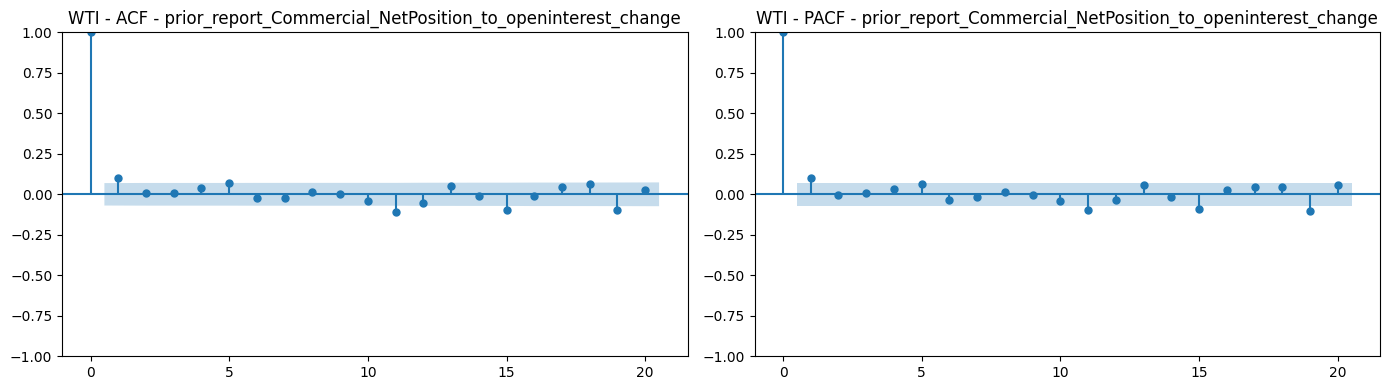

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(dataset['prior_report_Commercial_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("WTI - ACF - prior_report_Commercial_NetPosition_to_openinterest_change")

plot_pacf(dataset['prior_report_Commercial_NetPosition_to_openinterest_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("WTI - PACF - prior_report_Commercial_NetPosition_to_openinterest_change")

plt.tight_layout()
plt.show()